In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans

In [ ]:
Univ = pd.read_csv("Universities.csv")
Univ

In [ ]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization
scaler = StandardScaler() # scaler is an object name of StandardScalar class, you can give any name
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:]) # fit_transform() is a method of StandardScalar class
scaled_Univ_df

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

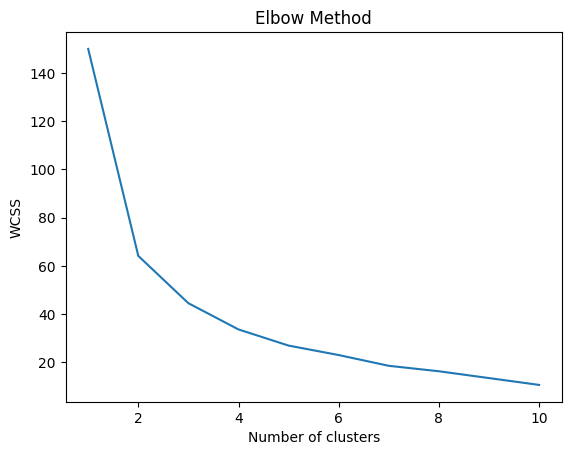

In [4]:
# Inertia measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
# and summing these squares across one cluster.
# A good model is one with low inertia AND a low number of clusters (K).

# To plot the elbow method graph, we need to compute the WCSS (Within Cluster Sum of Squares)
# Let us say max. no. of clusters could be 10.
# As we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no. of clusters

wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_Univ_df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia. In WCSS list we will append all distances i.e if cluster is 10 what is the value, if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#init='k-means++': init is random initialization method. We can choose random if choice of initial centroid is to be random.
# But as we don't want to fall into random initialization, we are going to use this initialization method.
# ‘k-means++’ : selects initial cluster centroids using sampling, based on an empirical probability distribution of the points’.
# It makes several trials at each sampling step and selects the best centroid among them.
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=init%7B'k%2Dmeans%2B%2B,contribution%20to%20the%20overall%20inertia.
# max_iter=300: Suppose dataset has 200 data points. We will make 10 clusters of 20 points each in 1st iteration. Such how many combinations you can form for data points?
# so default value is 300. so we will keep it as it is.
# random_state=0: Use an int to make the randomness deterministic i.e. same results every time. It determines random number generation for centroid initialization.


In [ ]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.9536816278831,
 23.028199078329926,
 18.56891703085987,
 16.301664640974554,
 13.47880438976081,
 10.640545447539141]

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(scaled_Univ_df)# assign cluster numbers to universities

In [ ]:
predict

In [ ]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(scaled_Univ_df)

In [ ]:
clusters_new.labels_

In [ ]:
new_predict

In [ ]:
#Assign clusters to the data set
#Univ['clusterid_new'] = clusters_new.labels_
Univ['clusterid_new'] = new_predict

In [ ]:
Univ

In [ ]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()


In [ ]:
Univ[Univ['clusterid_new']==0]

In [ ]:
Univ[Univ['clusterid_new']==0].shape[0]

In [ ]:
Univ[Univ['clusterid_new']==2]

In [ ]:
Univ[Univ['clusterid_new']==1].shape[0]

4